# AGRICULTURE Stocks Analysis

## BBTC:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf 

In [2]:
agri = yf.download('BBTC.NS', start="2019-01-01", end="2023-12-30")
agri.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1316.199951,1332.000000,1308.00,1323.900024,1316.590698,44727
2019-01-02,1320.000000,1331.000000,1292.00,1305.250000,1298.043701,57452
2019-01-03,1310.000000,1325.500000,1296.00,1298.650024,1291.480103,43110
2019-01-04,1303.000000,1308.800049,1282.00,1291.650024,1284.518799,47457
2019-01-07,1304.900024,1325.000000,1298.75,1312.750000,1305.502319,56622


In [3]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
agri.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1098.757084,1119.939311,1080.101741,1096.087005,1092.902390,1.205823e+05
std,171.889280,175.634046,169.192067,171.237234,170.545689,2.123948e+05
min,607.950012,630.000000,535.000000,594.250000,591.696045,0.000000e+00
25%,943.174988,960.950012,928.075012,942.200012,940.213623,3.767700e+04
50%,1110.000000,1129.000000,1090.000000,1106.750000,1104.187256,6.112100e+04
75%,1224.950012,1248.000000,1201.049988,1219.350037,1214.835327,1.144780e+05
max,1551.000000,1589.699951,1500.550049,1574.300049,1574.300049,2.666853e+06


In [5]:
agri.rename(columns={"Adj Close": "price_t"}, inplace=True)
agri.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,1316.199951,1332.000000,1308.00,1323.900024,1316.590698,44727
2019-01-02,1320.000000,1331.000000,1292.00,1305.250000,1298.043701,57452
2019-01-03,1310.000000,1325.500000,1296.00,1298.650024,1291.480103,43110
2019-01-04,1303.000000,1308.800049,1282.00,1291.650024,1284.518799,47457
2019-01-07,1304.900024,1325.000000,1298.75,1312.750000,1305.502319,56622


## Calculate daily returns.

In [6]:
agri['daily_returns']=agri["price_t"].pct_change() 
agri     

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,1316.199951,1332.000000,1308.000000,1323.900024,1316.590698,44727,NaN
2019-01-02,1320.000000,1331.000000,1292.000000,1305.250000,1298.043701,57452,-0.014087
2019-01-03,1310.000000,1325.500000,1296.000000,1298.650024,1291.480103,43110,-0.005057
2019-01-04,1303.000000,1308.800049,1282.000000,1291.650024,1284.518799,47457,-0.005390
2019-01-07,1304.900024,1325.000000,1298.750000,1312.750000,1305.502319,56622,0.016336
...,...,...,...,...,...,...,...
2023-12-22,1323.500000,1352.949951,1311.000000,1328.400024,1328.400024,55323,-0.000414
2023-12-26,1330.550049,1499.000000,1322.400024,1468.699951,1468.699951,680789,0.105616
2023-12-27,1468.650024,1572.550049,1441.900024,1524.050049,1524.050049,574476,0.037686


## Visualize the trend of stock price.

<Axes: xlabel='Date'>

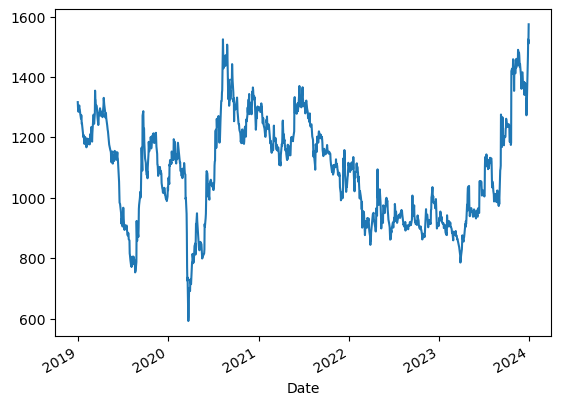

In [7]:
agri['price_t'].plot()

## Moving Average (30 day)

<Axes: xlabel='Date'>

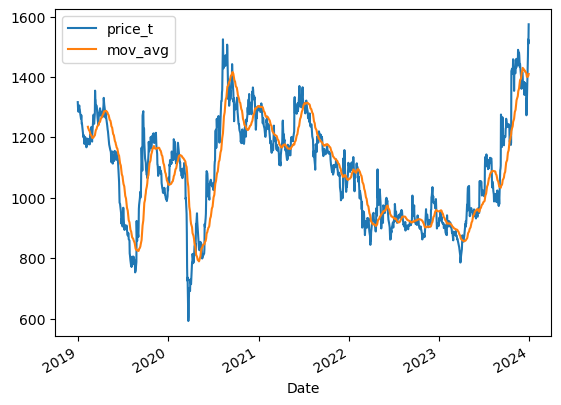

In [8]:
agri['mov_avg']= agri['price_t'].rolling(30).mean() 

agri[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)

<Axes: xlabel='Date'>

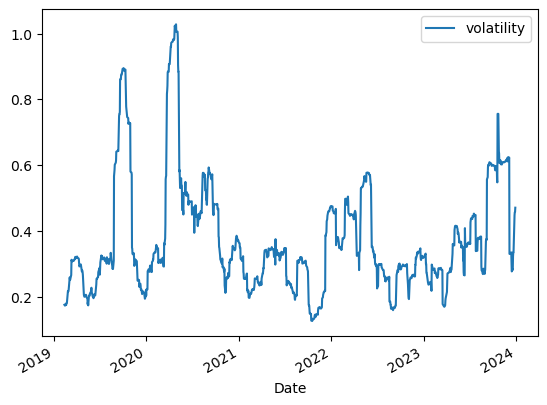

In [9]:
agri['Log_Ret'] = np.log(agri['price_t'] / agri ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

agri ['volatility'] = agri ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

agri [['volatility']] .plot() 


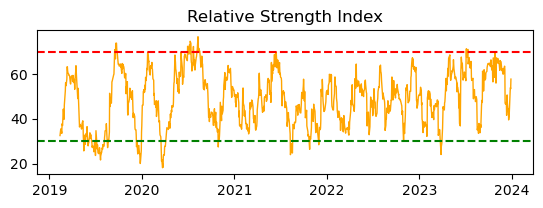

In [10]:
#### RSI (30-day)

change = agri["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## PATANJALI:

In [11]:
pat = yf.download('PATANJALI.NS', start="2019-01-01", end="2023-12-30")
pat.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,935.0,935.0,855.0,855.0,848.173584,60559
2019-01-02,815.0,815.0,815.0,815.0,808.492920,4380
2019-01-03,775.0,845.0,775.0,775.0,768.812317,114741
2019-01-04,775.0,810.0,755.0,810.0,803.532898,55801
2019-01-07,840.0,850.0,825.0,850.0,843.213501,31902


In [12]:
pat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [13]:
pat.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,854.702672,869.168502,836.906883,852.652025,847.225622,3.899153e+05
std,347.341118,352.877533,341.185791,347.508558,346.445352,1.881706e+06
min,16.200001,17.000000,16.200001,17.000000,16.864271,0.000000e+00
25%,625.000000,638.525024,610.975006,621.649994,616.686646,1.165050e+04
50%,881.750000,899.000000,855.000000,881.750000,875.850891,3.160000e+04
75%,1115.225037,1132.625000,1090.000000,1104.474976,1097.088379,2.138430e+05
max,1643.000000,1665.000000,1597.050049,1621.650024,1621.650024,4.037192e+07


In [14]:
pat.rename(columns={"Adj Close": "price_t"}, inplace=True)
pat.head()	


,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,935.0,935.0,855.0,855.0,848.173584,60559
2019-01-02,815.0,815.0,815.0,815.0,808.492920,4380
2019-01-03,775.0,845.0,775.0,775.0,768.812317,114741
2019-01-04,775.0,810.0,755.0,810.0,803.532898,55801
2019-01-07,840.0,850.0,825.0,850.0,843.213501,31902


## Calculate daily returns.

In [15]:
pat['daily_returns']=pat["price_t"].pct_change()
pat 

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,935.0,935.000000,855.000000,855.000000,848.173584,60559,NaN
2019-01-02,815.0,815.000000,815.000000,815.000000,808.492920,4380,-0.046784
2019-01-03,775.0,845.000000,775.000000,775.000000,768.812317,114741,-0.049080
2019-01-04,775.0,810.000000,755.000000,810.000000,803.532898,55801,0.045161
2019-01-07,840.0,850.000000,825.000000,850.000000,843.213501,31902,0.049383
...,...,...,...,...,...,...,...
2023-12-22,1560.0,1629.699951,1551.000000,1621.650024,1621.650024,1280841,0.049238
2023-12-26,1643.0,1643.000000,1597.050049,1617.900024,1617.900024,501409,-0.002312
2023-12-27,1625.0,1625.000000,1585.000000,1591.099976,1591.099976,508537,-0.016565


## Visualize the trend of stock price.

<Axes: xlabel='Date'>

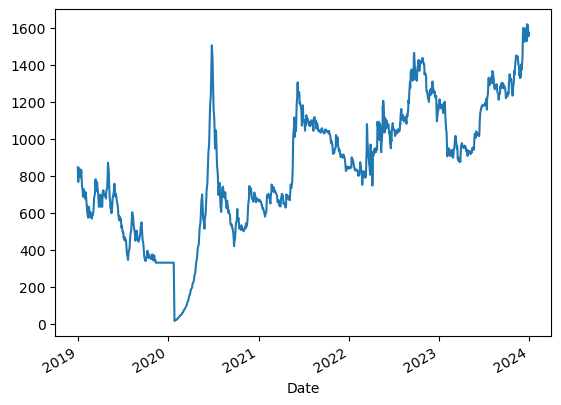

In [16]:
pat['price_t'].plot()

## Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

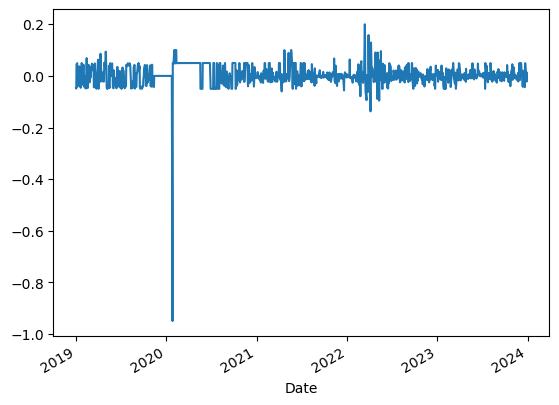

In [17]:
pat['daily_returns'].plot() 

## Moving Average (30 day)

<Axes: xlabel='Date'>

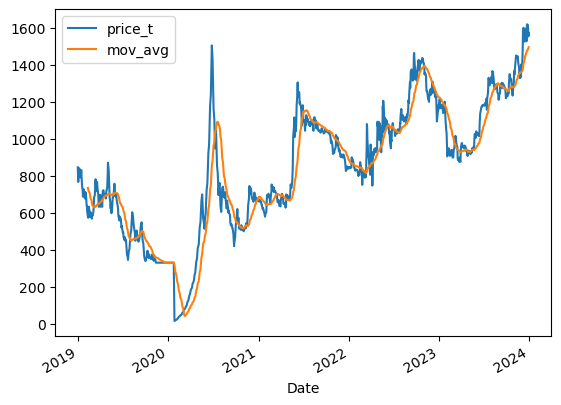

In [18]:
pat['mov_avg']= pat['price_t'].rolling(30).mean() 

pat[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)

<Axes: xlabel='Date'>

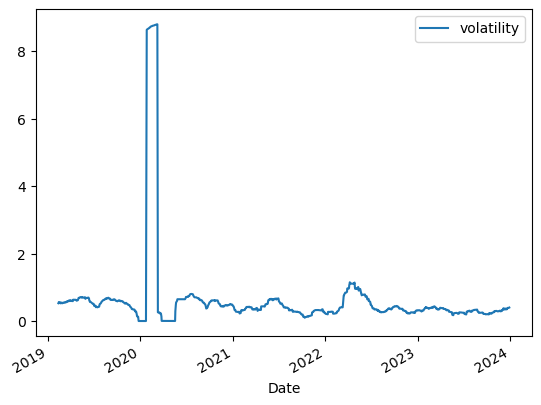

In [19]:
pat['Log_Ret'] = np.log(pat['price_t'] / pat ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

pat ['volatility'] = pat ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

pat [['volatility']] .plot() 


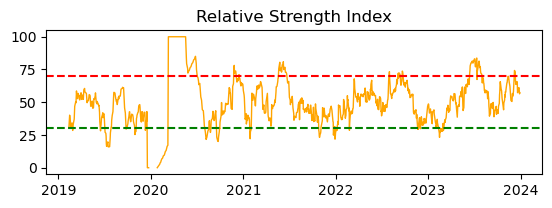

In [20]:
#### RSI (30-day)

change = pat["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## EIDPARRY:

In [21]:
eid = yf.download('EIDPARRY.NS', start="2019-01-01", end="2023-12-30")
eid.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,206.300003,207.449997,205.100006,206.300003,193.320038,15953
2019-01-02,205.500000,208.899994,204.500000,205.949997,192.992050,38105
2019-01-03,205.500000,209.000000,205.000000,205.949997,192.992050,55687
2019-01-04,205.949997,211.500000,204.600006,209.050003,195.897003,136884
2019-01-07,210.000000,216.000000,208.850006,214.699997,201.191513,117928


In [22]:
eid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [23]:
eid.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,373.656599,381.017004,367.172591,373.248016,361.546854,4.325352e+05
std,147.031051,149.115975,144.967680,146.926116,146.516819,6.558008e+05
min,110.949997,117.000000,102.150002,107.199997,102.013008,0.000000e+00
25%,217.849998,223.125000,211.324997,215.549995,204.620766,1.381420e+05
50%,413.899994,422.000000,405.250000,414.149994,395.239441,2.561390e+05
75%,498.000000,508.250000,491.000000,498.150009,490.589493,4.655325e+05
max,661.000000,670.000000,637.549988,662.000000,645.782715,8.035541e+06


In [24]:
eid.rename(columns={"Adj Close": "price_t"}, inplace=True)
eid.head()	


,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,206.300003,207.449997,205.100006,206.300003,193.320038,15953
2019-01-02,205.500000,208.899994,204.500000,205.949997,192.992050,38105
2019-01-03,205.500000,209.000000,205.000000,205.949997,192.992050,55687
2019-01-04,205.949997,211.500000,204.600006,209.050003,195.897003,136884
2019-01-07,210.000000,216.000000,208.850006,214.699997,201.191513,117928


## Calculate daily returns.

In [25]:
eid['daily_returns']=eid["price_t"].pct_change()
eid 

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,206.300003,207.449997,205.100006,206.300003,193.320038,15953,NaN
2019-01-02,205.500000,208.899994,204.500000,205.949997,192.992050,38105,-0.001697
2019-01-03,205.500000,209.000000,205.000000,205.949997,192.992050,55687,0.000000
2019-01-04,205.949997,211.500000,204.600006,209.050003,195.897003,136884,0.015052
2019-01-07,210.000000,216.000000,208.850006,214.699997,201.191513,117928,0.027027
...,...,...,...,...,...,...,...
2023-12-22,557.000000,564.400024,552.000000,563.000000,563.000000,311314,0.011680
2023-12-26,565.799988,566.450012,560.000000,564.950012,564.950012,457210,0.003464
2023-12-27,566.000000,568.400024,561.349976,565.250000,565.250000,604952,0.000531


## Visualize the trend of stock price.

<Axes: xlabel='Date'>

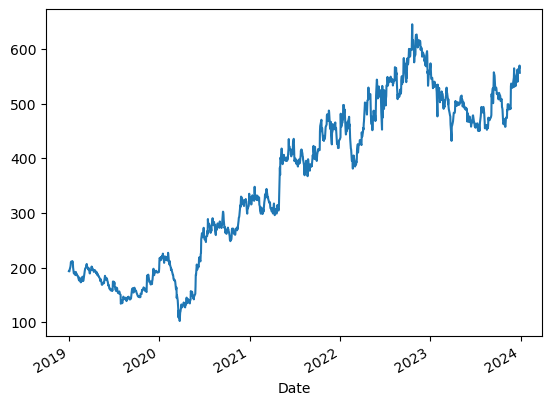

In [26]:
eid['price_t'].plot()

## Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

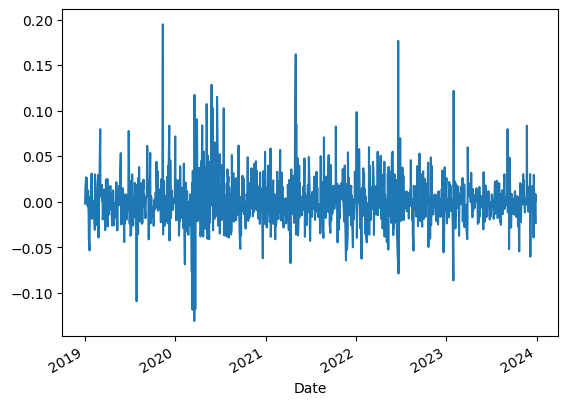

In [27]:
eid['daily_returns'].plot()

## Moving Average (30 day)

<Axes: xlabel='Date'>

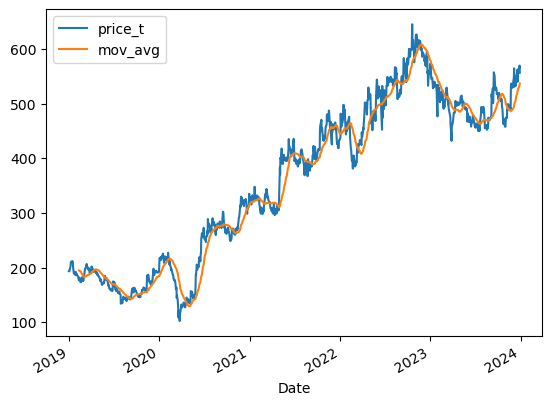

In [28]:
eid['mov_avg']= eid['price_t'].rolling(30).mean() 

eid[[ 'price_t' , 'mov_avg']].plot()

## Volatility Measures (30 Day)

<Axes: xlabel='Date'>

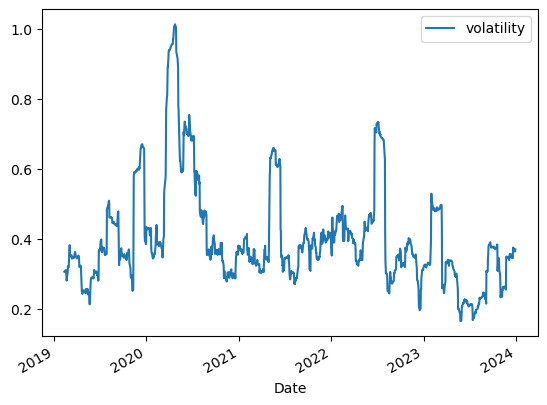

In [29]:
eid['Log_Ret'] = np.log(eid['price_t'] / eid ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

eid ['volatility'] = eid ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

eid [['volatility']] .plot() 


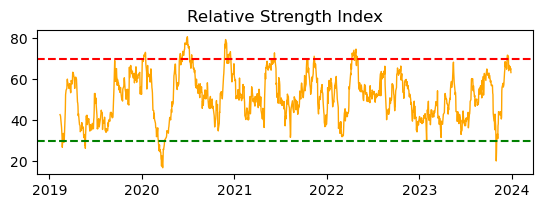

In [30]:
#### RSI (30-day)

change = eid["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## RENUKA:

#### Calculate daily returns.

In [31]:
renu = yf.download('RENUKA.NS', start="2019-01-01", end="2023-12-30")
renu.head() 

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,10.80,11.10,10.65,11.05,11.05,578774
2019-01-02,11.00,11.05,10.85,10.90,10.90,411621
2019-01-03,11.00,11.20,10.75,11.00,11.00,820288
2019-01-04,10.90,11.15,10.90,11.00,11.00,610094
2019-01-07,10.95,11.10,10.75,10.80,10.80,475604


In [32]:
renu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [33]:
renu.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,27.056194,27.680810,26.414089,26.959433,26.959433,8.417413e+06
std,18.882568,19.320594,18.473426,18.822124,18.822124,1.329139e+07
min,3.450000,3.650000,3.250000,3.450000,3.450000,0.000000e+00
25%,9.600000,9.800000,9.275000,9.450000,9.450000,1.007178e+06
50%,25.450001,26.299999,24.900000,25.350000,25.350000,4.077099e+06
75%,45.925001,47.000000,45.099998,45.775000,45.775000,9.887561e+06
max,66.449997,68.750000,64.349998,65.349998,65.349998,1.239002e+08


In [34]:
renu.rename(columns={"Adj Close": "price_t"}, inplace=True)
renu.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,10.80,11.10,10.65,11.05,11.05,578774
2019-01-02,11.00,11.05,10.85,10.90,10.90,411621
2019-01-03,11.00,11.20,10.75,11.00,11.00,820288
2019-01-04,10.90,11.15,10.90,11.00,11.00,610094
2019-01-07,10.95,11.10,10.75,10.80,10.80,475604


#### Calculate daily returns.

In [35]:
renu['daily_returns']=renu["price_t"].pct_change()
renu

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,10.800000,11.100000,10.650000,11.050000,11.050000,578774,NaN
2019-01-02,11.000000,11.050000,10.850000,10.900000,10.900000,411621,-0.013575
2019-01-03,11.000000,11.200000,10.750000,11.000000,11.000000,820288,0.009174
2019-01-04,10.900000,11.150000,10.900000,11.000000,11.000000,610094,0.000000
2019-01-07,10.950000,11.100000,10.750000,10.800000,10.800000,475604,-0.018182
...,...,...,...,...,...,...,...
2023-12-22,47.250000,47.599998,46.900002,47.200001,47.200001,5550024,0.003188
2023-12-26,47.549999,47.599998,46.599998,46.849998,46.849998,3909658,-0.007415
2023-12-27,47.150002,47.250000,46.400002,46.599998,46.599998,5577879,-0.005336


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

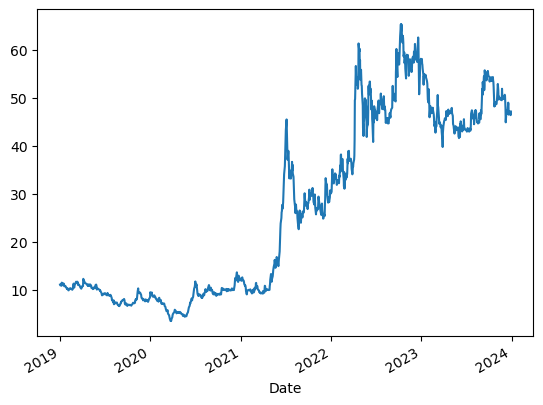

In [36]:
renu['price_t'].plot()

### Visualize the trend of stock daily returns

<Axes: xlabel='Date'>

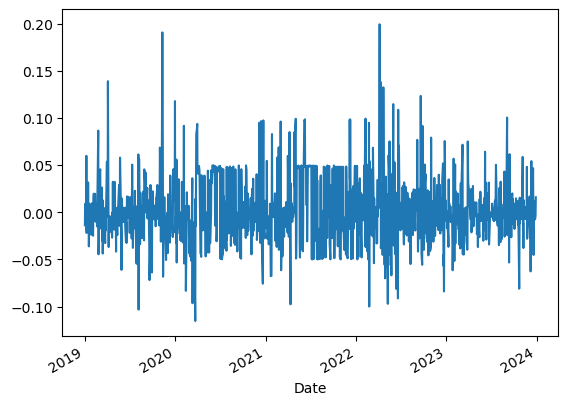

In [37]:
renu['daily_returns'].plot() 

### Moving Average (30 day)

<Axes: xlabel='Date'>

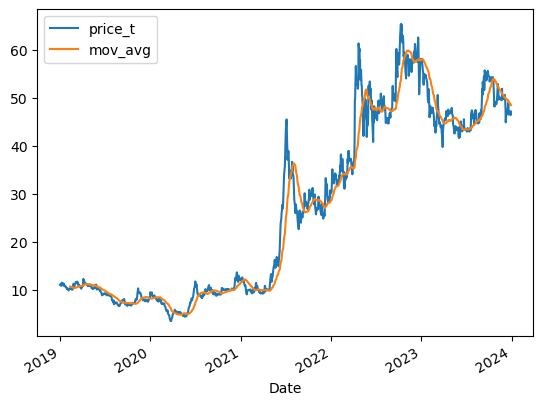

In [38]:
renu['mov_avg']= renu['price_t'].rolling(30).mean() 

renu[[ 'price_t' , 'mov_avg']].plot() 


### Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

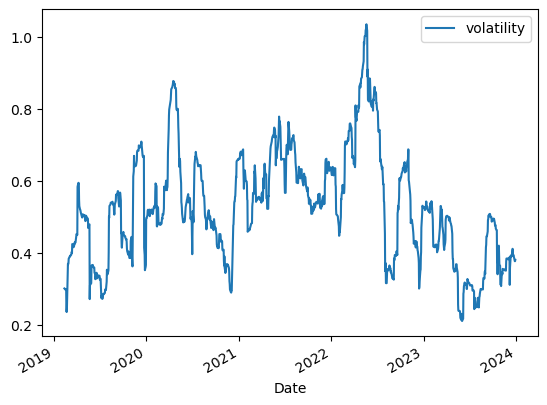

In [39]:
renu['Log_Ret'] = np.log(renu['price_t'] / renu ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

renu ['volatility'] = renu ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

renu [['volatility']] .plot() 


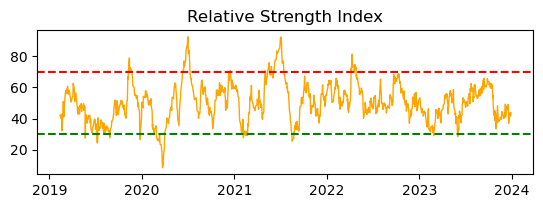

In [40]:
#### RSI (30-day)

change = renu["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

# TATACONSUM.

In [41]:
tata = yf.download('TATACONSUM.NS', start="2019-01-01", end="2023-12-30")
tata.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,219.949997,221.050003,218.050003,219.100006,209.879868,716275
2019-01-02,219.000000,220.350006,213.600006,214.600006,205.569275,1081778
2019-01-03,214.949997,215.350006,209.899994,210.050003,201.210724,2096553
2019-01-04,210.600006,214.899994,210.000000,213.800003,204.802917,1213181
2019-01-07,214.600006,216.949997,214.000000,214.949997,205.904510,871903


In [42]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [43]:
tata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,599.256398,606.332390,591.677245,598.882753,588.988852,2.804875e+06
std,232.813383,234.144949,231.069678,232.611687,233.286594,3.371240e+06
min,179.050003,186.000000,177.050003,179.750000,172.185791,0.000000e+00
25%,364.600006,370.074997,358.750000,364.474991,352.968842,1.211458e+06
50%,699.000000,708.349976,691.000000,700.849976,688.810486,1.998064e+06
75%,788.350006,795.000000,780.750000,788.800018,778.384094,3.308988e+06
max,1053.949951,1094.000000,1047.699951,1086.800049,1086.800049,6.355124e+07


In [44]:
tata.rename(columns={"Adj Close": "price_t"}, inplace=True)
tata.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,219.949997,221.050003,218.050003,219.100006,209.879868,716275
2019-01-02,219.000000,220.350006,213.600006,214.600006,205.569275,1081778
2019-01-03,214.949997,215.350006,209.899994,210.050003,201.210724,2096553
2019-01-04,210.600006,214.899994,210.000000,213.800003,204.802917,1213181
2019-01-07,214.600006,216.949997,214.000000,214.949997,205.904510,871903


### Calculate daily returns.

In [45]:
tata['daily_returns']=tata["price_t"].pct_change() 
tata 

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,219.949997,221.050003,218.050003,219.100006,209.879868,716275,NaN
2019-01-02,219.000000,220.350006,213.600006,214.600006,205.569275,1081778,-0.020538
2019-01-03,214.949997,215.350006,209.899994,210.050003,201.210724,2096553,-0.021202
2019-01-04,210.600006,214.899994,210.000000,213.800003,204.802917,1213181,0.017853
2019-01-07,214.600006,216.949997,214.000000,214.949997,205.904510,871903,0.005379
...,...,...,...,...,...,...,...
2023-12-22,986.000000,998.299988,979.650024,992.799988,992.799988,1491449,0.013785
2023-12-26,993.000000,1017.000000,992.799988,1007.349976,1007.349976,1804990,0.014656
2023-12-27,1014.950012,1029.000000,1010.099976,1026.750000,1026.750000,1799498,0.019258


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

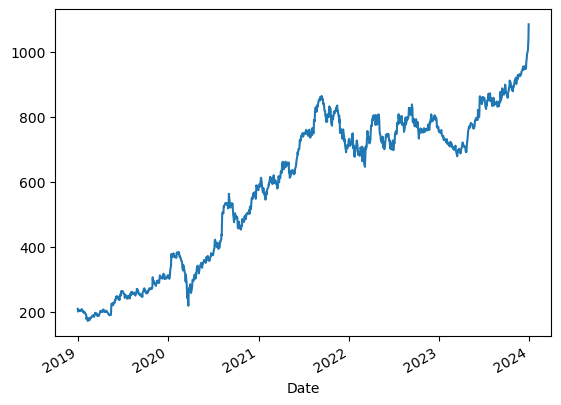

In [46]:
tata['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

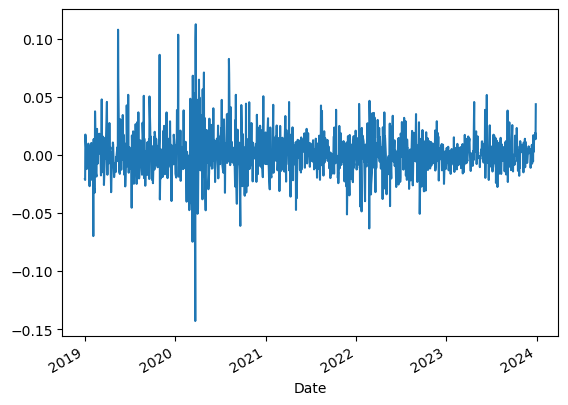

In [47]:
tata['daily_returns'].plot()

### Moving Average (30 day)

<Axes: xlabel='Date'>

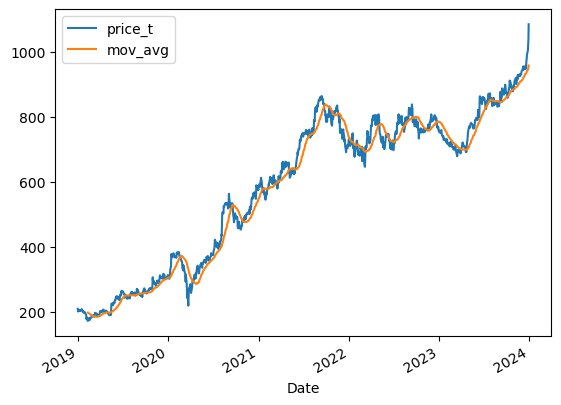

In [48]:
tata['mov_avg']= tata['price_t'].rolling(30).mean() 

tata[[ 'price_t' , 'mov_avg']].plot() 

### Volatility Measures (30 Day)

<Axes: xlabel='Date'>

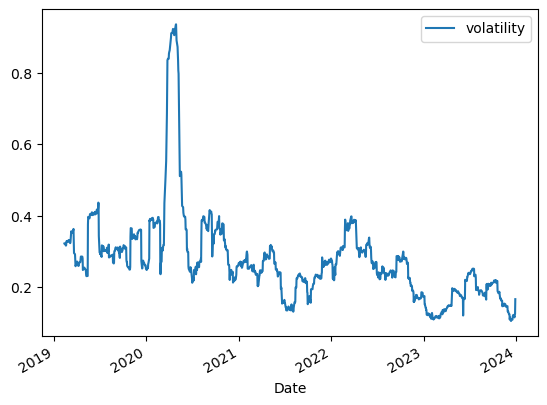

In [49]:
tata['Log_Ret'] = np.log(tata['price_t'] / tata ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

tata ['volatility'] = tata ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

tata [['volatility']] .plot() 


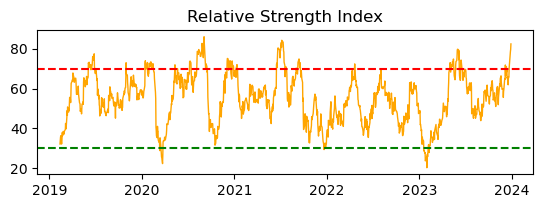

In [50]:
#### RSI (30-day)

change = tata["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Correlation Matrix Between Stocks and Indices.

In [51]:
tkr = ['BBTC.NS','EIDPARRY.NS','PATANJALI.NS','RENUKA.NS','TATACONSUM.NS','^NSEI','^NSEBANK']
agri = yf.download(tkr, start="2019-01-01", end="2023-12-30",group_by='tkr')

close_prices = pd.DataFrame()
for i in tkr:
    close_prices[i] = agri[i]['Adj Close']

##compute the correlation matrix
corr_matrix = close_prices.corr()
corr_matrix

[*********************100%%**********************]  7 of 7 completed


,BBTC.NS,EIDPARRY.NS,PATANJALI.NS,RENUKA.NS,TATACONSUM.NS,^NSEI,^NSEBANK
BBTC.NS,1.000000,-0.147429,0.024119,-0.269866,-0.011753,-0.048124,-0.079883
EIDPARRY.NS,-0.147429,1.000000,0.839796,0.933681,0.922761,0.921309,0.825771
PATANJALI.NS,0.024119,0.839796,1.000000,0.823584,0.796144,0.804377,0.715886
RENUKA.NS,-0.269866,0.933681,0.823584,1.000000,0.826771,0.875997,0.830341
TATACONSUM.NS,-0.011753,0.922761,0.796144,0.826771,1.000000,0.934969,0.801416
^NSEI,-0.048124,0.921309,0.804377,0.875997,0.934969,1.000000,0.951029
^NSEBANK,-0.079883,0.825771,0.715886,0.830341,0.801416,0.951029,1.000000


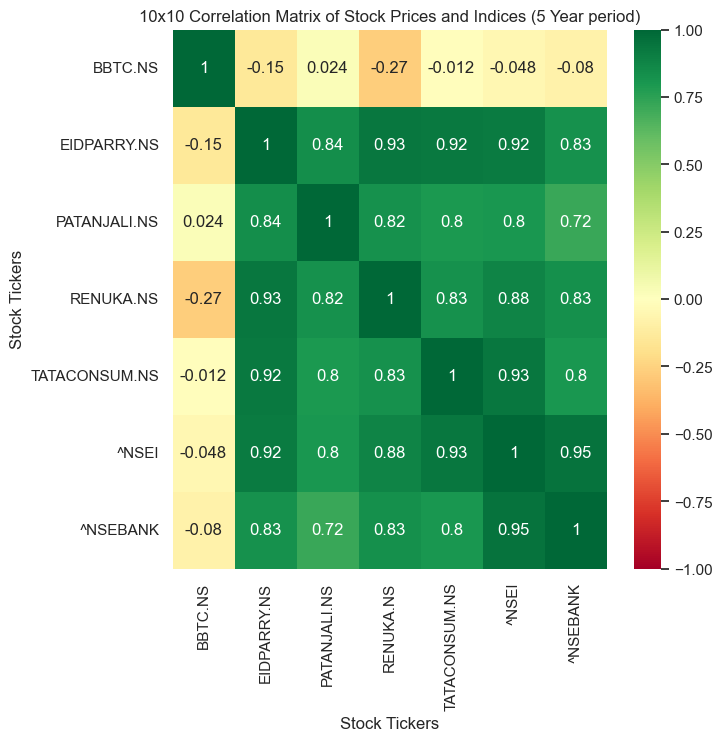

In [52]:
##create a heatmap of the correlation matrix using Seaborn

sns.set(style='white')
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices and Indices (5 Year period)')

# display the plot
plt.show()

## Sector-wise Analysis

### Compare and contrast the performance of stocks within each sector.

In [69]:
# Define a list of stock tickers representing each sector
agri_tickers = ['BBTC.NS','EIDPARRY.NS','PATANJALI.NS','RENUKA.NS','TATACONSUM.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
agri_data = get_stock_data(agri_tickers)


# Check the retrieved data
print("Agriculture Data:")
print(agri_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Agriculture Data:
                BBTC.NS  EIDPARRY.NS  PATANJALI.NS  RENUKA.NS  TATACONSUM.NS
Date                                                                        
2019-01-01  1316.590698   193.320038    848.173584      11.05     209.879868
2019-01-02  1298.043701   192.992050    808.492920      10.90     205.569275
2019-01-03  1291.480103   192.992050    768.812317      11.00     201.210724
2019-01-04  1284.518799   195.897003    803.532898      11.00     204.802917
2019-01-07  1305.502319   201.191513    843.213501      10.80     205.904510


### Identify sector leaders and laggards.

In [70]:
# Define a list of stock tickers representing each sector
tickers = ['BBTC.NS','EIDPARRY.NS','PATANJALI.NS','RENUKA.NS','TATACONSUM.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-31')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
data = get_stock_data(tickers)

# Calculate cumulative returns for each sector
cumulative_returns = (1 + data.pct_change()).cumprod()


# Calculate overall cumulative returns for each sector
overall_returns = cumulative_returns.iloc[-1, :]


# Identify leaders and laggards
leader = overall_returns.idxmax()
laggard = overall_returns.idxmin()


# Print results
print(f"Sector - Leader: {leader}, Laggard: {laggard}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Sector - Leader: TATACONSUM.NS, Laggard: BBTC.NS


# Trend Analysis:


# Moving averages to identify trends in stock prices.

## BBTC

[*********************100%%**********************]  1 of 1 completed


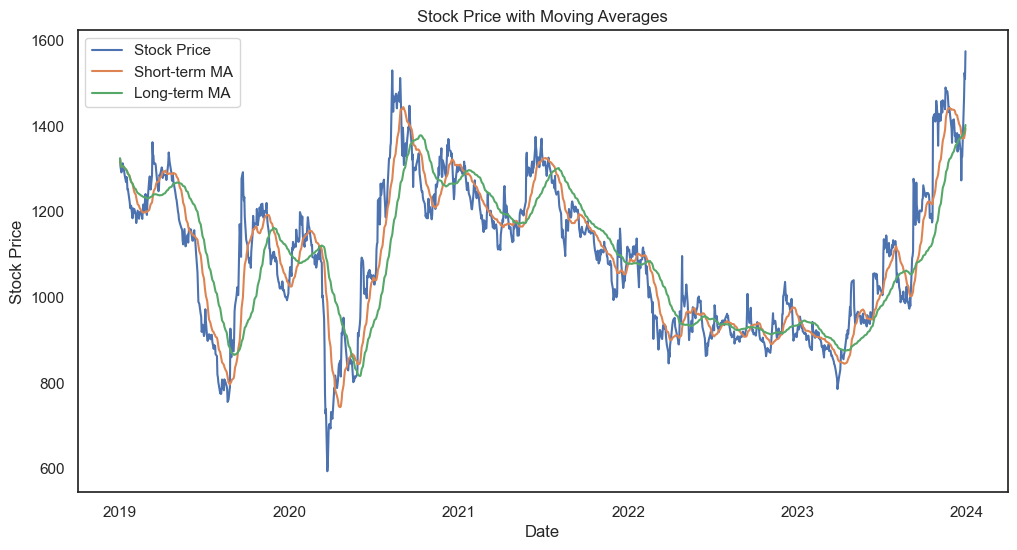

In [71]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'BBTC.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## EIDPARRY.

[*********************100%%**********************]  1 of 1 completed


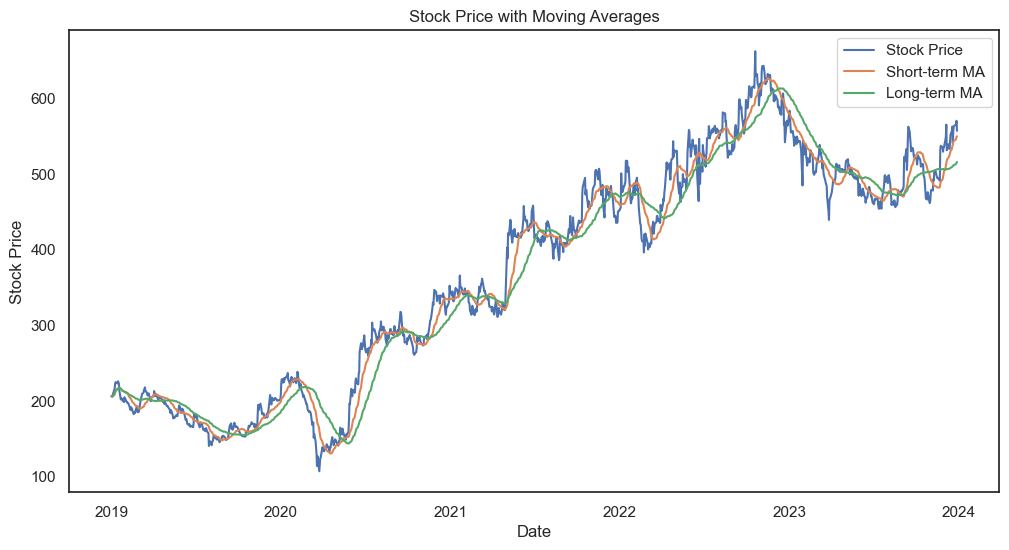

In [72]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'EIDPARRY.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## PATANJALI

[*********************100%%**********************]  1 of 1 completed


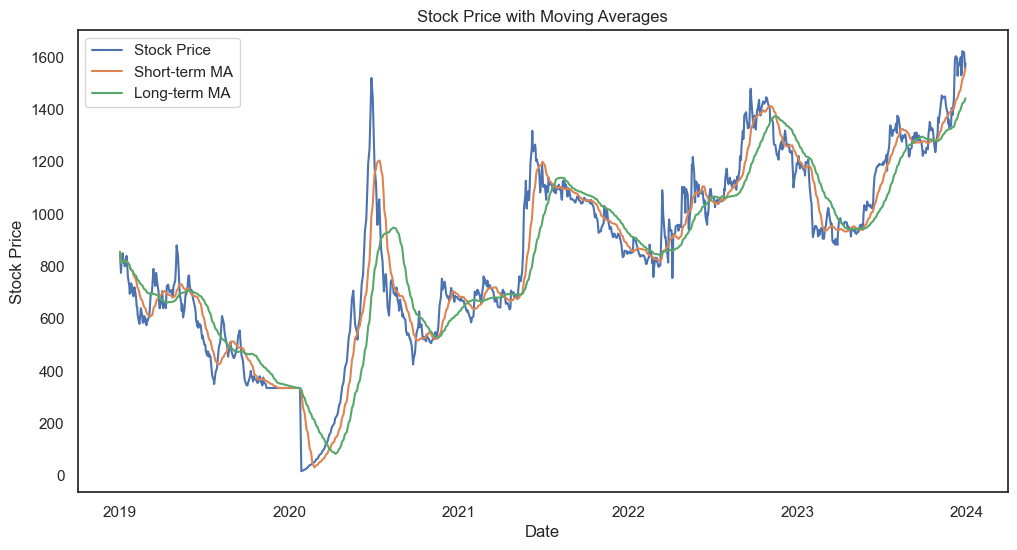

In [73]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'PATANJALI.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## RENUKA

[*********************100%%**********************]  1 of 1 completed


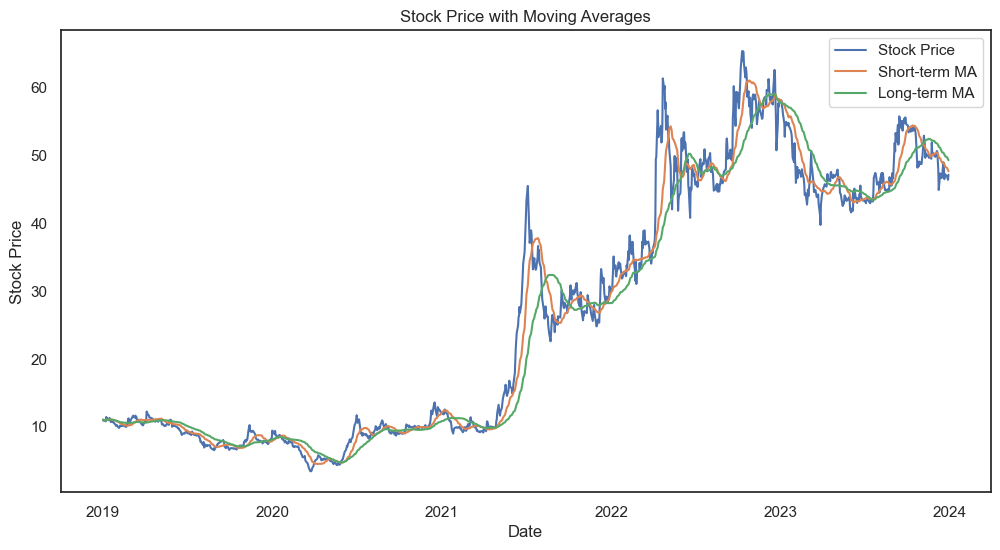

In [74]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'RENUKA.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## TATACONSUM

[*********************100%%**********************]  1 of 1 completed


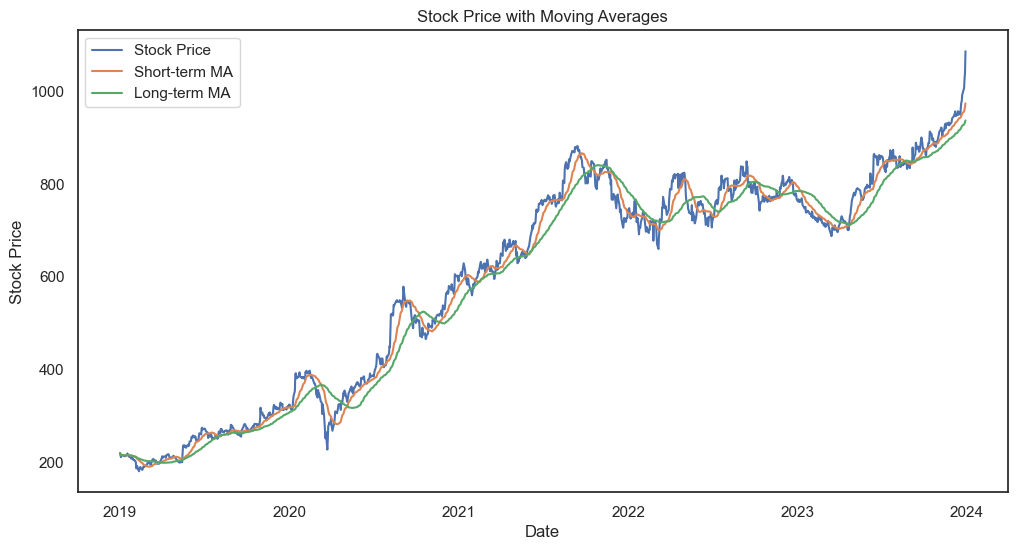

In [75]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'TATACONSUM.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

# Plot stock prices and indices over time to observe long-term trends.


[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  2 of 2 completed


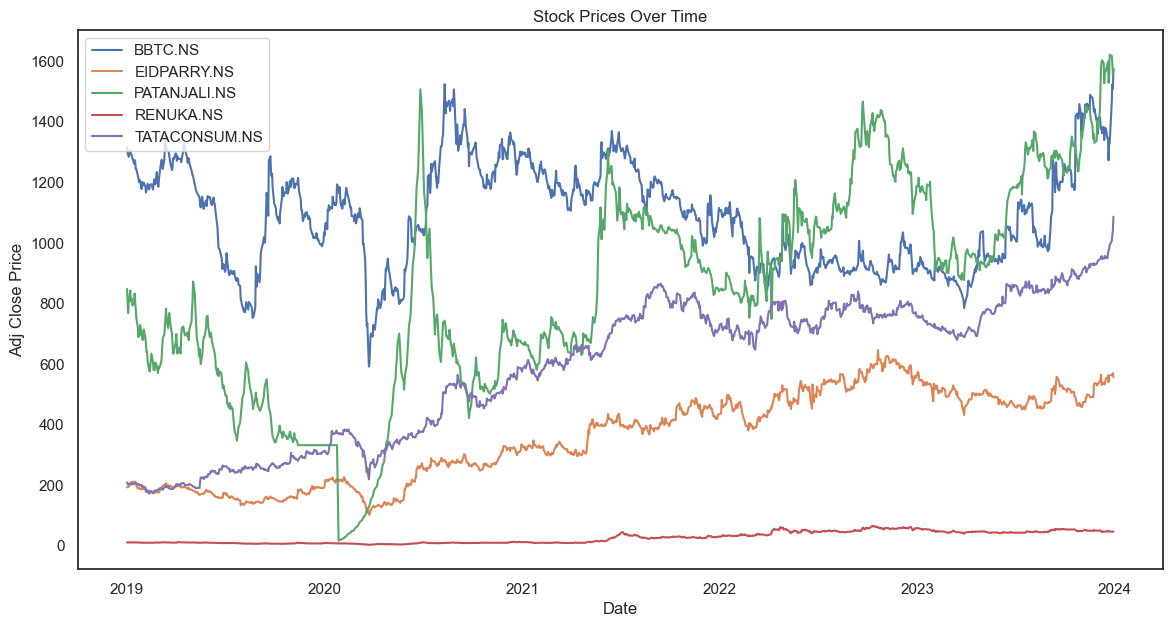

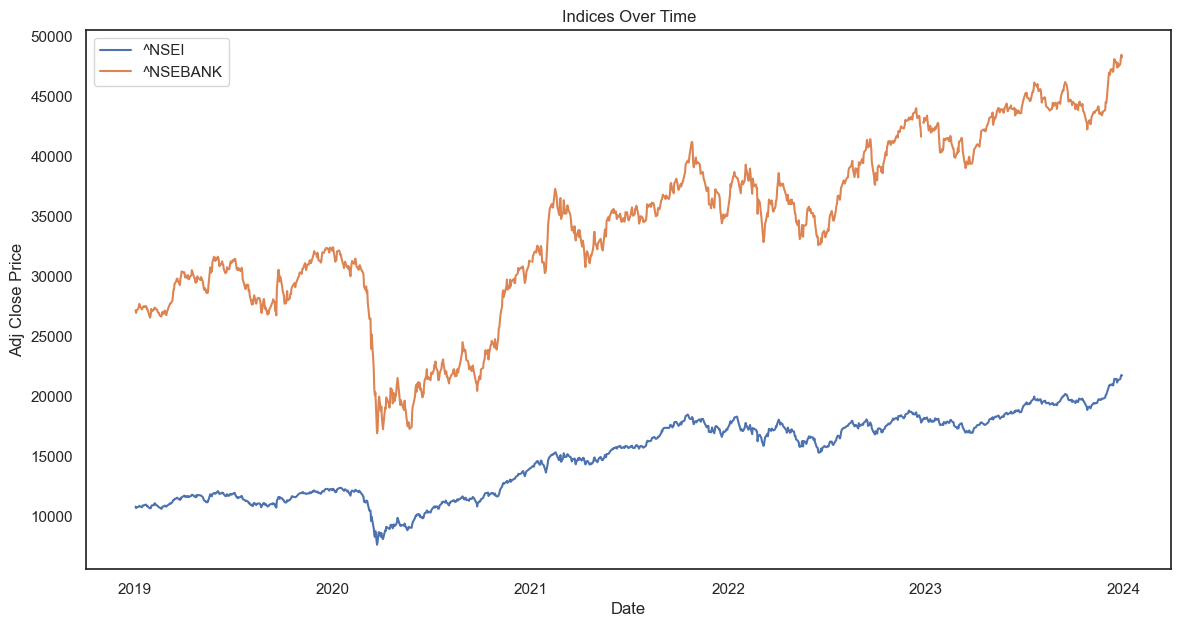

In [76]:
# Function to fetch historical stock and index data from Yahoo Finance
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Define the stock symbols, index symbols, and date range
stock_symbols = ['BBTC.NS', 'EIDPARRY.NS', 'PATANJALI.NS','RENUKA.NS', 'TATACONSUM.NS']  # Example stock symbols
index_symbols = ['^NSEI', '^NSEBANK']  # Example index symbols
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock and index data
stock_data = get_data(stock_symbols, start_date, end_date)
index_data = get_data(index_symbols, start_date, end_date)

# Plotting the stock prices
plt.figure(figsize=(14, 7))
for stock_symbol in stock_symbols:
    plt.plot(stock_data[stock_symbol], label=stock_symbol)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Plotting the indices
plt.figure(figsize=(14, 7))
for index_symbol in index_symbols:
    plt.plot(index_data[index_symbol], label=index_symbol)

plt.title('Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Volatility Analysis:


### Calculate and analyse the volatility of each stock and index.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


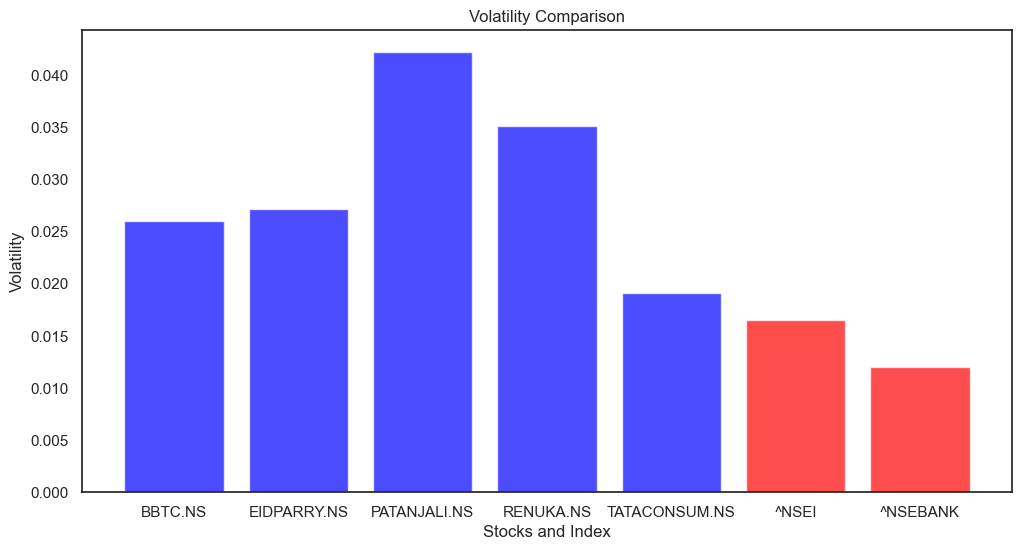

Stock Volatilities:
BBTC.NS          0.026044
EIDPARRY.NS      0.027135
PATANJALI.NS     0.042210
RENUKA.NS        0.035118
TATACONSUM.NS    0.019121
dtype: float64

Index Volatility:
^NSEBANK    0.016501
^NSEI       0.012040
dtype: float64


In [77]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate volatility
def calculate_volatility(returns):
    return returns.std()

# Define the stock tickers and index
stock_tickers = ['BBTC.NS', 'EIDPARRY.NS', 'PATANJALI.NS','RENUKA.NS', 'TATACONSUM.NS']
index_ticker = '^NSEI','^NSEBANK'  # S&P 500 as an example

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data for each stock and index
stock_data = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})
index_data = get_stock_data(index_ticker, start_date, end_date)

# Calculate daily returns for each stock and index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Calculate volatility for each stock and index
stock_volatility = stock_returns.apply(calculate_volatility)
index_volatility = calculate_volatility(index_returns)

# Plotting the volatility
plt.figure(figsize=(12, 6))

for ticker in stock_tickers:
    plt.bar(ticker, stock_volatility[ticker], color='blue', alpha=0.7)

plt.bar(index_ticker, index_volatility, color='red', alpha=0.7)

plt.title('Volatility Comparison')
plt.xlabel('Stocks and Index')
plt.ylabel('Volatility')
plt.show()

# Display the calculated volatilities
print("Stock Volatilities:")
print(stock_volatility)

print("\nIndex Volatility:")
print(index_volatility)

# Seasonal Patterns:

# Check for any seasonal patterns or recurring trends in stock prices.


[*********************100%%**********************]  1 of 1 completed
                   Open         High      Low        Close    Adj Close  \
Date                                                                      
2019-01-01  1316.199951  1332.000000  1308.00  1323.900024  1316.590698   
2019-01-02  1320.000000  1331.000000  1292.00  1305.250000  1298.043701   
2019-01-03  1310.000000  1325.500000  1296.00  1298.650024  1291.480103   
2019-01-04  1303.000000  1308.800049  1282.00  1291.650024  1284.518799   
2019-01-07  1304.900024  1325.000000  1298.75  1312.750000  1305.502319   

            Volume  
Date                
2019-01-01   44727  
2019-01-02   57452  
2019-01-03   43110  
2019-01-04   47457  
2019-01-07   56622  


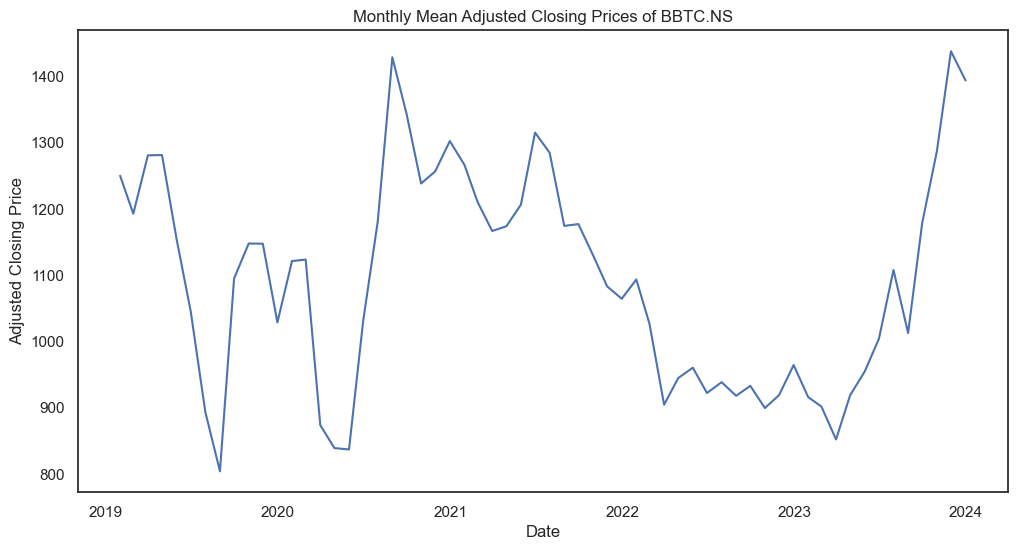

In [78]:
# Define the stock symbol and the time period
stock_symbol = "BBTC.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-01-01  206.300003  207.449997  205.100006  206.300003  193.320038   15953
2019-01-02  205.500000  208.899994  204.500000  205.949997  192.992050   38105
2019-01-03  205.500000  209.000000  205.000000  205.949997  192.992050   55687
2019-01-04  205.949997  211.500000  204.600006  209.050003  195.897003  136884
2019-01-07  210.000000  216.000000  208.850006  214.699997  201.191513  117928


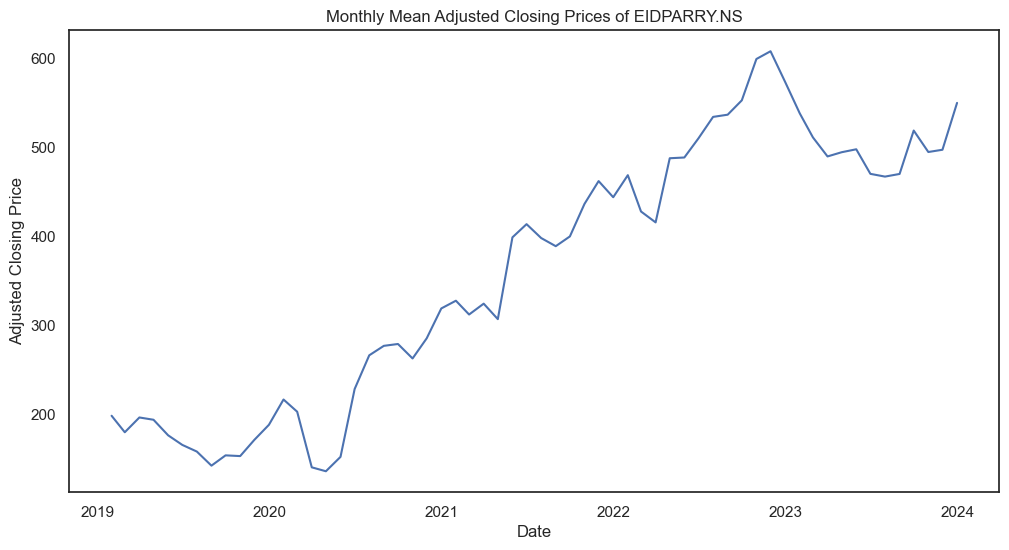

In [79]:
# Define the stock symbol and the time period
stock_symbol = "EIDPARRY.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed
             Open   High    Low  Close   Adj Close  Volume
Date                                                      
2019-01-01  935.0  935.0  855.0  855.0  848.173584   60559
2019-01-02  815.0  815.0  815.0  815.0  808.492920    4380
2019-01-03  775.0  845.0  775.0  775.0  768.812317  114741
2019-01-04  775.0  810.0  755.0  810.0  803.532898   55801
2019-01-07  840.0  850.0  825.0  850.0  843.213501   31902


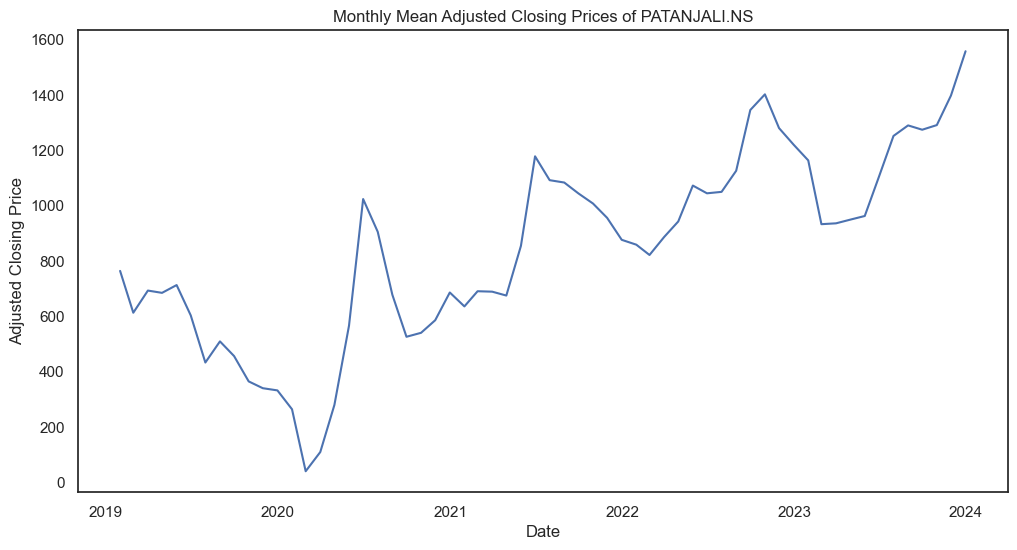

In [80]:
# Define the stock symbol and the time period
stock_symbol = "PATANJALI.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2019-01-01  10.80  11.10  10.65  11.05      11.05  578774
2019-01-02  11.00  11.05  10.85  10.90      10.90  411621
2019-01-03  11.00  11.20  10.75  11.00      11.00  820288
2019-01-04  10.90  11.15  10.90  11.00      11.00  610094
2019-01-07  10.95  11.10  10.75  10.80      10.80  475604


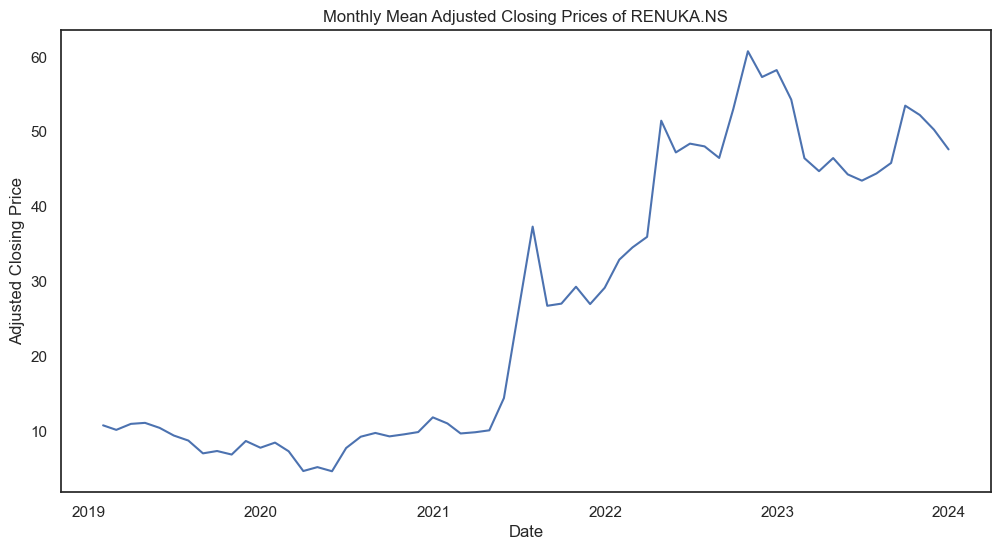

In [81]:
# Define the stock symbol and the time period
stock_symbol = "RENUKA.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  219.949997  221.050003  218.050003  219.100006  209.879868   
2019-01-02  219.000000  220.350006  213.600006  214.600006  205.569275   
2019-01-03  214.949997  215.350006  209.899994  210.050003  201.210724   
2019-01-04  210.600006  214.899994  210.000000  213.800003  204.802917   
2019-01-07  214.600006  216.949997  214.000000  214.949997  205.904510   

             Volume  
Date                 
2019-01-01   716275  
2019-01-02  1081778  
2019-01-03  2096553  
2019-01-04  1213181  
2019-01-07   871903  


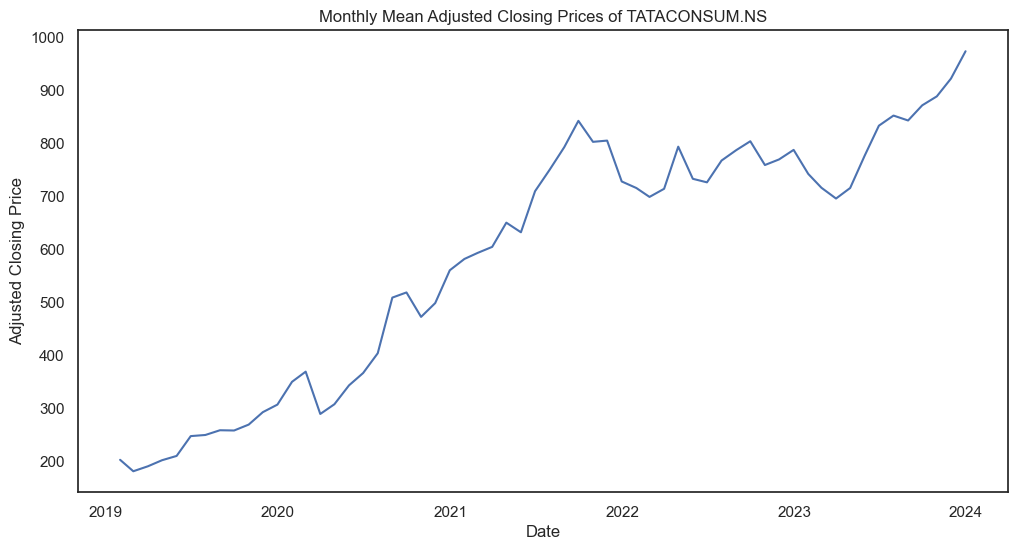

In [82]:
# Define the stock symbol and the time period
stock_symbol = "TATACONSUM.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

# Financial Ratios:


### Calculate and analyse key financial ratios for each company.


In [83]:
# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(stock_data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch financial data
financial_data = get_financial_data(stock_tickers, start_date, end_date)

# Calculate ratios
financial_ratios = calculate_ratios(financial_data)

# Display the calculated ratios
print("Financial Ratios:")
print(financial_ratios)

Financial Ratios:
               Return on Equity (ROE)  Return on Assets (ROA)  \
BBTC.NS                           NaN                0.000349   
EIDPARRY.NS                       NaN                0.001056   
PATANJALI.NS                      NaN                0.000451   
RENUKA.NS                         NaN                0.014166   
TATACONSUM.NS                     NaN                0.000648   

               Debt to Equity Ratio  
BBTC.NS                   -3.402749  
EIDPARRY.NS               -2.411904  
PATANJALI.NS              -1.206506  
RENUKA.NS                -24.291417  
TATACONSUM.NS             -1.000000  


### Compare ratios across companies and sectors.


In [84]:
# List of stock tickers for the companies you want to analyze
sector_tickers = {'Healthcare':  ['APOLLOHOSP.NS', 'CIPLA.NS', 'DIVISLAB.NS','DRREDDY.NS', 'SUNPHARMA.NS'], 'Agriculture': ['BBTC.NS', 'EIDPARRY.NS', 'PATANJALI.NS','RENUKA.NS', 'TATACONSUM.NS']}

# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Function to compare ratios across companies and sectors
def compare_ratios(companies, sector_data):
    comparisons = pd.DataFrame()

    for company in companies:
        company_data = get_financial_data([company], start_date, end_date)
        company_ratios = calculate_ratios(company_data)
        comparisons[company] = company_ratios.iloc[:, 0]  # Assuming ROE for comparison

    for sector, sector_companies in sector_data.items():
        sector_data = get_financial_data(sector_companies, start_date, end_date)
        sector_ratios = calculate_ratios(sector_data)
        comparisons[sector] = sector_ratios.mean(axis=1)

    return comparisons

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Compare ratios across companies and sectors
comparison_data = compare_ratios(stock_tickers, sector_tickers)

# Display the comparison data
print("Comparison of Ratios:")
print(comparison_data)

Comparison of Ratios:
            BBTC.NS  EIDPARRY.NS  PATANJALI.NS  RENUKA.NS  TATACONSUM.NS  \
Open       0.370901     0.370901      0.370901   0.370901       0.370901   
High       0.363181     0.363181      0.363181   0.363181       0.363181   
Low        0.363852     0.363852      0.363852   0.363852       0.363852   
Close      0.373051     0.373051      0.373051   0.373051       0.373051   
Adj Close  0.381897     0.381897      0.381897   0.381897       0.381897   
Volume          inf          inf           inf        inf            inf   

           Healthcare  Agriculture  
Open        -0.193175    -0.193175  
High        -0.210558    -0.210558  
Low         -0.193875    -0.193875  
Close       -0.205267    -0.205267  
Adj Close   -0.205818    -0.205818  
Volume            inf          inf  
